In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
dfx=pd.read_csv('/content/df_X.csv').iloc[:,1:]
dfx.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
dfy=pd.read_csv('/content/df_y.csv').iloc[:,1:]
dfy.head()

,y
0,no
1,no
2,no
3,no
4,no


**Show specs:**

In [ ]:
dfx.shape
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
dfy.shape
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [ ]:
df=pd.concat([dfx,dfy],axis=1)
df.rename(columns = {'y':'term deposit?'}, inplace = True)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,term deposit?
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()#.sum()

,0
poutcome,36959
contact,13020
education,1857
job,288
month,0


<Axes: >

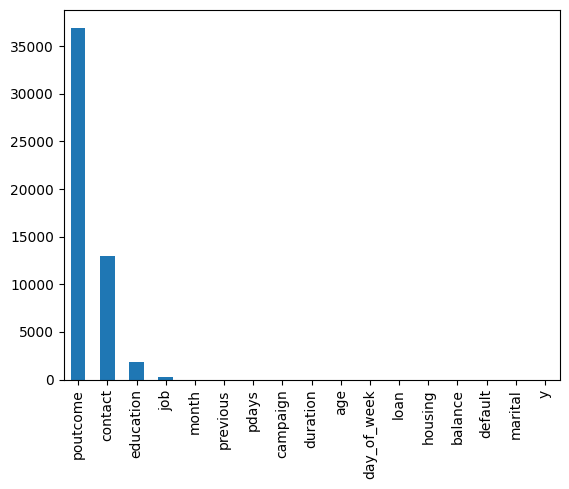

In [ ]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

**Dropping:**

In [ ]:
df1=df.copy()
df1.drop(['poutcome', 'contact'],axis=1,inplace=True)
df1.head()


,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,term deposit?
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no


In [ ]:
df1.shape #ok, dropped

(45211, 15)

In [ ]:
df1.corr(numeric_only=True)

,age,balance,day_of_week,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
df['job'].unique()
df1.dropna(subset=['job'],axis=0,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1['job'].isna().sum()


0

<Axes: >

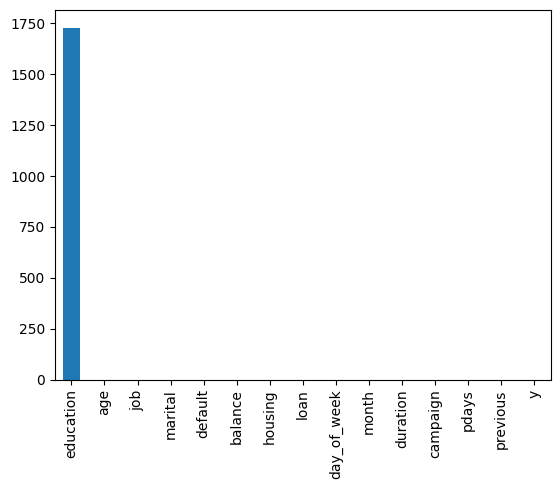

In [ ]:
df1.isnull().sum().sort_values(ascending=False).plot(kind='bar')

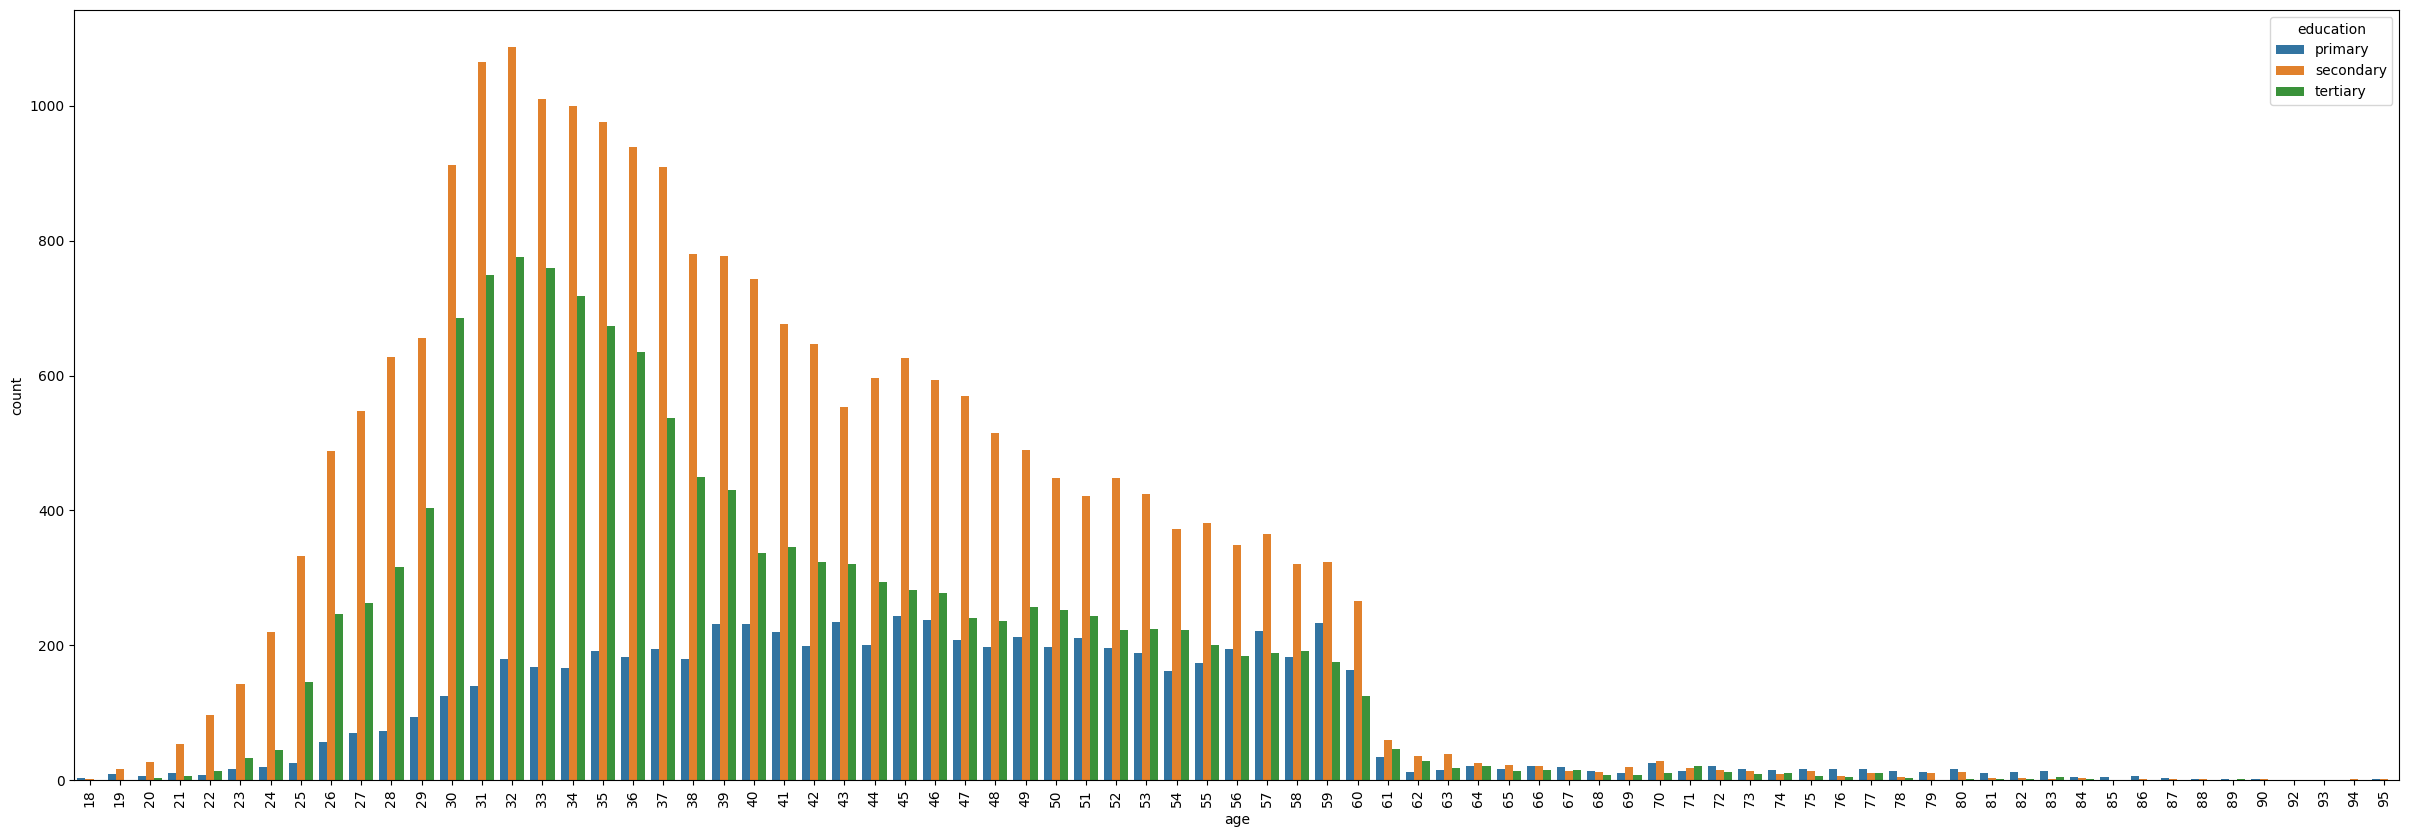

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, hue=df['education'], x=df['age'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.dropna(subset=['education'],axis=0,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1['education'].isna().sum()

0

In [ ]:
df1.duplicated().sum()
# df.drop_duplicates()
# df.reset_index(drop=True)

0

***Visualization:***

In [ ]:
count_col=list(df1.nunique().sort_values().index[:8])
count_col

['default',
 'housing',
 'loan',
 'term deposit?',
 'marital',
 'education',
 'job',
 'month']

<ipython-input-124-b8d569745506>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,n+1)


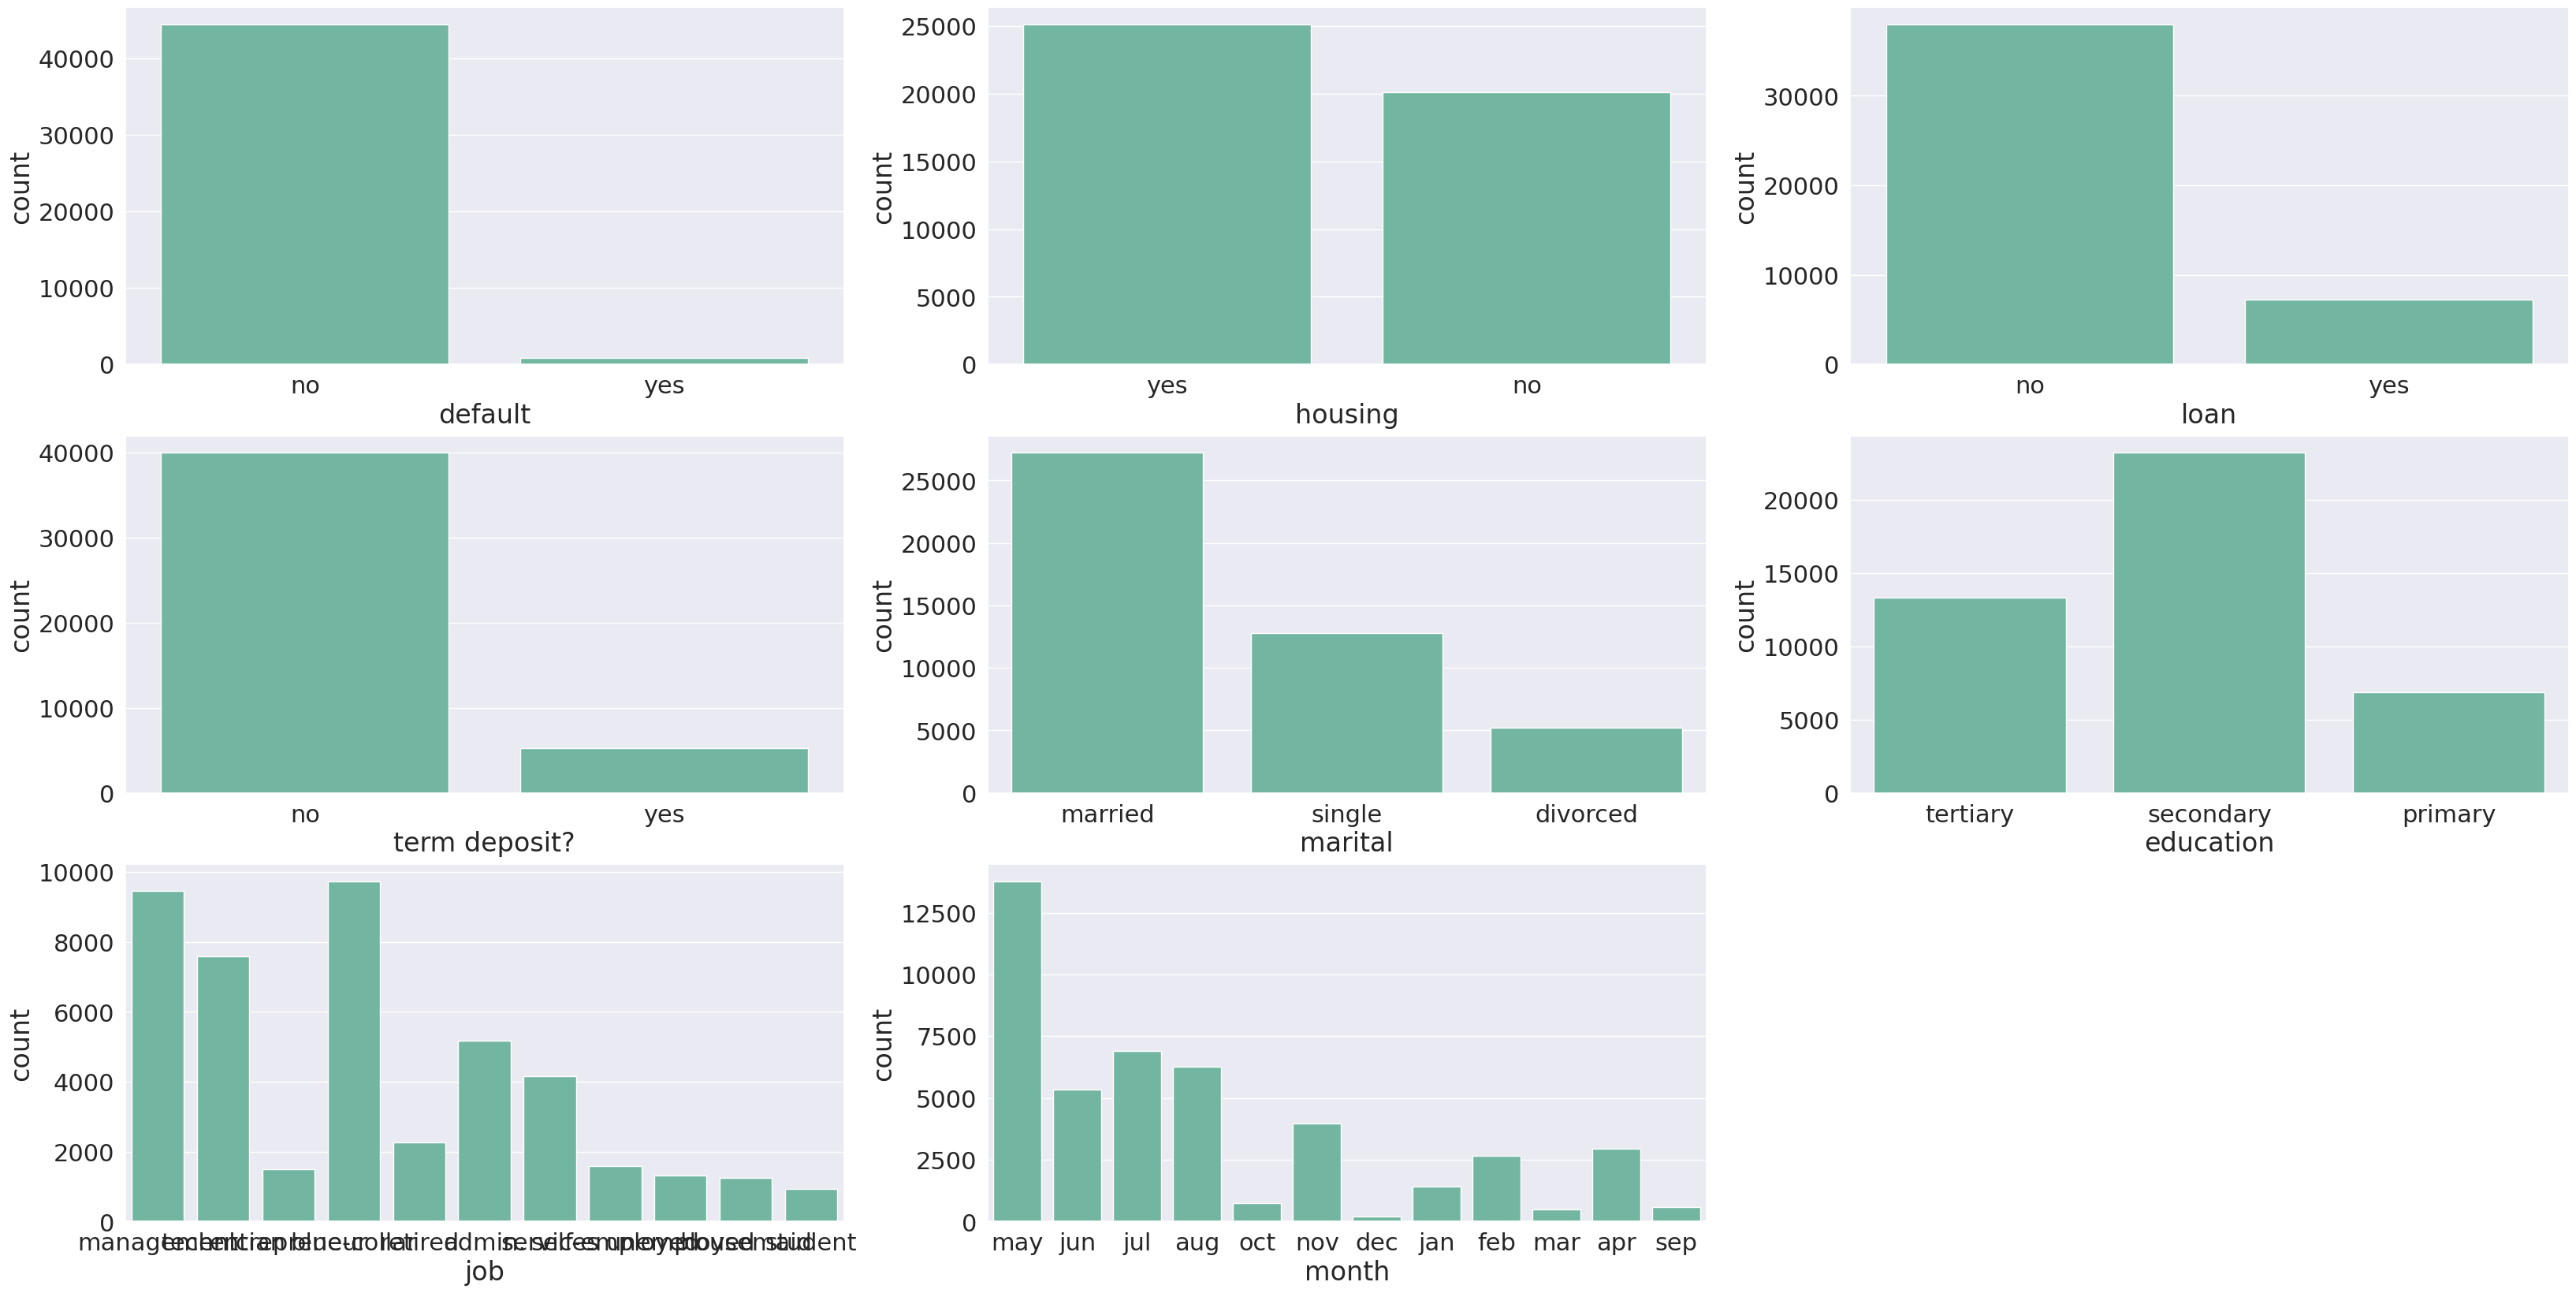

In [ ]:
plt.figure(figsize=(40, 20))

for n, k in enumerate(count_col):
  plt.subplot(3,3,n+1)
  sns.countplot(data=df1,x=df1[k])

sns.set_theme(style='darkgrid',palette='Set2',font_scale=2)
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

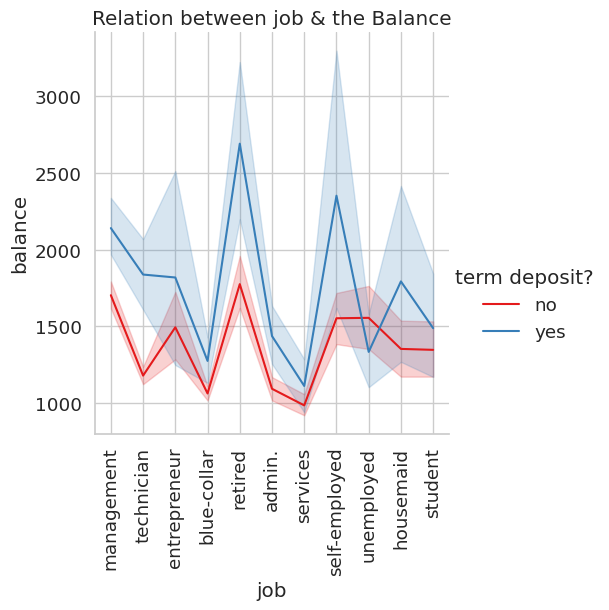

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid',palette='Set1',font_scale=1.2)
sns.relplot(data=df1, y=df1['balance'], x=df1['job'], kind='line',hue=df1['term deposit?'])
plt.xticks(rotation=90)
plt.title("Relation between job & the Balance")
plt.show()


<Figure size 1000x600 with 0 Axes>

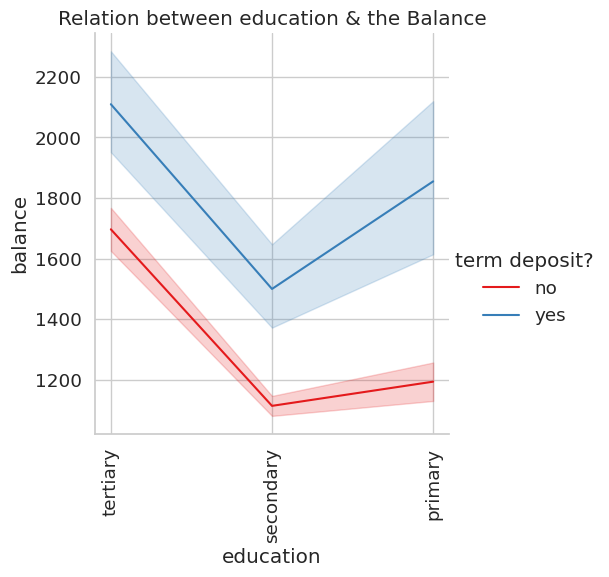

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid',palette='Set1',font_scale=1.2)
sns.relplot(data=df1, y=df1['balance'], x=df1['education'], kind='line',hue=df1['term deposit?'])
plt.title("Relation between education & the Balance")
plt.xticks(rotation=90)
plt.show()

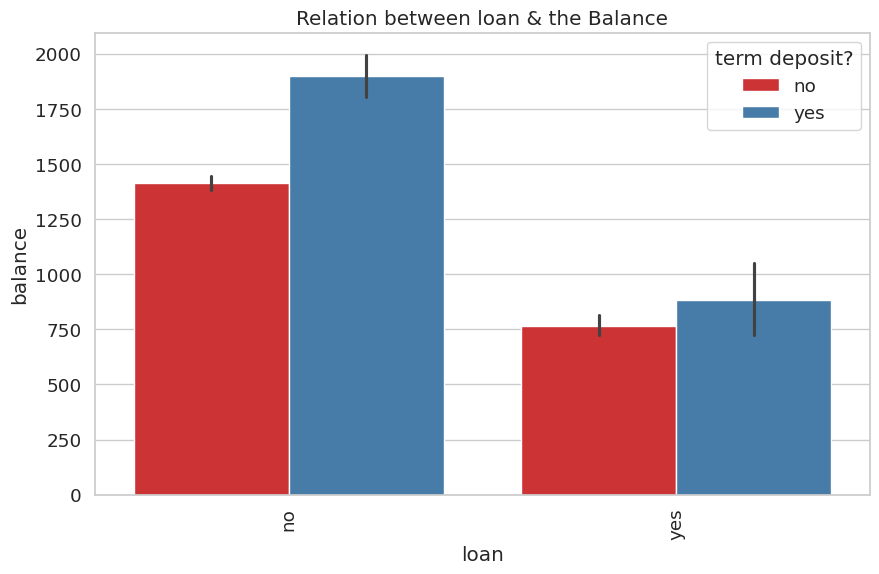

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid',palette='Set1',font_scale=1.2)
sns.barplot(data=df1, y=df1['balance'], x=df1['loan'],hue=df1['term deposit?'])
plt.title("Relation between loan & the Balance")
plt.xticks(rotation=90)
plt.show()

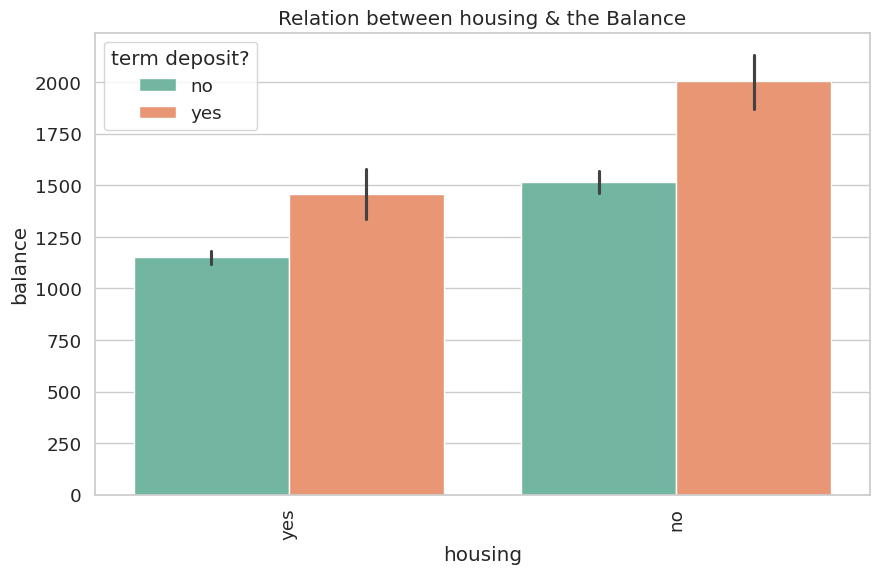

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid',palette='Set2',font_scale=1.2)
sns.barplot(data=df1, y=df1['balance'], x=df1['housing'],hue=df1['term deposit?'])
plt.title("Relation between housing & the Balance")
plt.xticks(rotation=90)
plt.show()

In [ ]:
n_cols=df1.select_dtypes('object')
n_cols.nunique()

,0
job,11
marital,3
education,3
default,2
housing,2
loan,2
month,12
term deposit?,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for c in ['job','marital','education','default','housing','loan','month',
          'term deposit?']:
  lb= LabelEncoder()
  df1[c]=lb.fit_transform(df1[c])

In [ ]:
df1.head(2)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,term deposit?
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

mscaler = MinMaxScaler(feature_range=(0,1))
y=df1['term deposit?']
x=df1.iloc[:,:-1]
x.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
x,y , random_state=104,test_size=0.25, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
mscaler.fit(X_train)
X_train =mscaler.transform(X_train)
X_test = mscaler.transform(X_test)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test,y_pred))

[0.06259213 0.04673475 0.50014908 ... 0.38824342 0.78825445 0.0487289 ]
0.08328111327660001
